# Tutorial on how to access the scattering coefficients following a tree structure

Given an image $x$, the scattering transform computes at most (generally) three layers of cascaded convolutions and non-linear operators: 

-*Zero-order coefficients:*  $Sx[0] = x \ast \phi$

-*First-order coefficients:*   $Sx[1][(i,l)] = | x \ast \psi_{(i,l)} | \ast \phi$

-*Second-order coefficients:*  $Sx[2][(i,l)][(j,l_2)] = | | x \ast \psi_{(i,l)} | \ast \psi_{(j,l_2)}| \ast \phi$

where $\psi$ is a band-pass filter, $\phi$ is a low-pass filter (normally a Gaussian), operator $\ast$ is a 2D convolution, and $|\cdot|$ is the complex modulus. If $x$ is of size $(px,px)$, the maximum number of scales is $J=\log_2(px)$ and $i \in [0,J-1]$.
For second-order coefficients, we compute coefficients with $j>i$, since other coefficients do not have enough energy to be significant. 

**Code**: Here, we will see how to access the different layers of the scattering transform. This can be done by accessing directly the 'S' matrix, which can be easy for the zero and first layer, but can get cumbersum for the second order cofficients, due tue its intrinsic tree structure and due to the condition $j>i$. 
We provide an easy way to accessing directly the different coefficients and layers with the dictionary 'scat_tree'. 

For more information about the scattering tree see 
    * Bruna, J., Mallat, S. 'Invariant Scattering Convolutional Networks'.IEEE TPAMI, 2012.


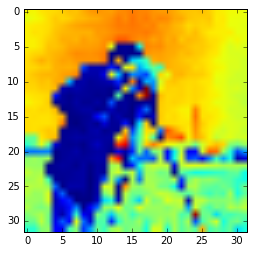

In [3]:
# Load an image

import numpy as np
import skimage.data as d
from skimage.transform import resize

import matplotlib.pylab as plt
%matplotlib inline 

px = 32 # size of the image (squared)
im= resize( d.camera(), (px,px))
plt.imshow(abs(im))

In [40]:
#Compute the scattering 

from scattering.filter_bank import multiresolution_filter_bank_morlet2d
from scattering.scattering import scattering

J=3 #number of scales
L=8 #number of angles

m=2 # compute up to the second order scattering coeffs. 

#get filters 
wavelet_filters, lw = multiresolution_filter_bank_morlet2d(px, J=J, L=L)

#scattering coefficients (S) and the access tree (scat_tree)
S,u,scat_tree = scattering(im[np.newaxis,:,:], wavelet_filters,m=m)


# Dictionary access to the scattering coefficients: 

Keys: 
    * Zero-order: we only have one key for the only coefficient: 
                scat_tree[0]
                
    * First-order: keys is a tuple with the scale and angle: 
                scat_tree[(i,l)]
                
    * Second-order: key is a tuple of two tuples, with the scale and angle of the first layer and then the scale and angle of the second layer: 
                scat_tree[( (i,l)  , (j,l_2) )]


# - Zero order scattering coefficients : $x \ast \phi$

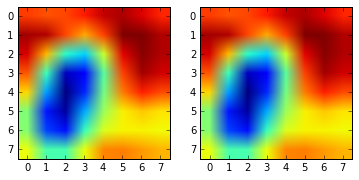

In [33]:
num_images,coef_index, spatial, spatial = S.shape

zero_order_coef_index = 0
#We can find the zero-order scattering coefficients in the S vector: 
S_zero_order = S[0,zero_order_coef_index,]

plt.subplot(1,2,1)
plt.imshow(S_zero_order)

#or we can access them using the scat_tree structure, which is a view of the S structure.

plt.subplot(1,2,2)
plt.imshow(scat_tree[0][0,:,:])
plt.show()


# - First order coefficients: $|x \ast \psi_{(i,l)}| \ast \phi$

We have $J \times L$ number of coefficients in the first order scattering vector, for each scale we have $L$ coefficients.  

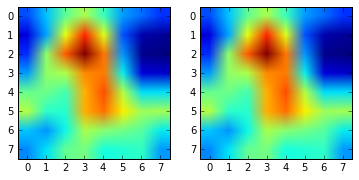

In [41]:
# we want to access one of the coefficients
i = 0
l = 3
S_first_order = S[0,i*L+l+1,:,:]

plt.subplot(1,2,1)
plt.imshow(S_first_order)

#using the stree structure
plt.subplot(1,2,2)
plt.imshow(scat_tree[(i,l)][0,:,:])
plt.show()

# - Second order coefficients: $|x \ast \psi_i| \ast \psi_j| \ast \phi$
The complete number of coefficients second order coefficients is: $\frac{J (J-1) L^2}{2}$

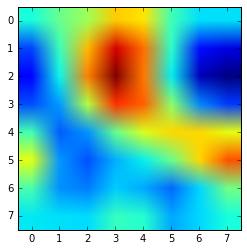

In [42]:
#We will just access the coefficient using the scat tree structure: 
j = 1
l_2 = 5
plt.imshow(scat_tree[((i,l),(j,l_2))][0,:,:])